# Geographical Indexing Explained

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [40]:
home = "../.."
images_dir = os.path.join(home, "static/images/")

Geohash level 3 (0.7° by 0.7°)

https://stackoverflow.com/a/39540339/7195218

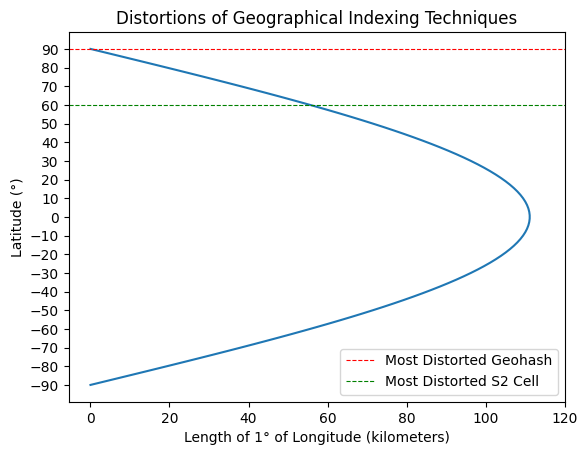

In [43]:
EARTH_RADIUS_KMS = 6371
latitude = np.linspace(-90, 90, 100)
one_degree_longitude_length = (np.pi / 180) * EARTH_RADIUS_KMS * np.cos(np.radians(latitude))
plt.plot(one_degree_longitude_length, latitude)
plt.xticks(np.arange(0, 140, 20))
plt.yticks(np.arange(-90, 100, 10))
plt.ylabel("Latitude (°)")
plt.xlabel("Length of 1° of Longitude (kilometers)")
plt.title("Distortions of Geographical Indexing Techniques")
plt.axhline(90, c="red", linestyle="dashed", linewidth=.8, label="Most Distorted Geohash")
plt.axhline(60, c="green", linestyle="dashed", linewidth=.8, label="Most Distorted S2 Cell")
plt.legend()
plt.savefig(os.path.join(images_dir, "longitude-distortion-of-geohash-s2.png"))
plt.show()

## S2

In [1]:
import s2cell

In [6]:
for level in range(1, 10):
    print(s2cell.lat_lon_to_cell_id(-11, 10, level))

2017612633061982208
1945555039024054272
1963569437533536256
1950058638651424768
1946680938930896896
1945836514000764928
1945625407768231936
1945642999954276352
1945647398000787456


## Z Order vs Hilbert Curve

https://github.com/trevorprater/pymorton

In [1]:
from hilbertcurve.hilbertcurve import HilbertCurve

In [5]:
n = 2
p = 2
hilbert_curve = HilbertCurve(p, n)
distances = list(range(16))
points = hilbert_curve.points_from_distances(distances)
for point, dist in zip(points, distances):
    print(f'point(h={dist}) = {point}')

point(h=0) = [0, 0]
point(h=1) = [1, 0]
point(h=2) = [1, 1]
point(h=3) = [0, 1]
point(h=4) = [0, 2]
point(h=5) = [0, 3]
point(h=6) = [1, 3]
point(h=7) = [1, 2]
point(h=8) = [2, 2]
point(h=9) = [2, 3]
point(h=10) = [3, 3]
point(h=11) = [3, 2]
point(h=12) = [3, 1]
point(h=13) = [2, 1]
point(h=14) = [2, 0]
point(h=15) = [3, 0]
